#Preparing the dataset

In [1]:
import logging

In [2]:
import time

In [3]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [4]:
# # !pip install --upgrade simpletransformers
# !pip install transformers==4.24.0
# from simpletransformers.classification import (
#     ClassificationModel, ClassificationArgs
# )

Import relevant tools

In [5]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, precision_score, recall_score

from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Upload the annotated news comment data and news content data

In [6]:
# from google.colab import files
# !ls
# !rm * # helps when we rerun the whole code for any reason. (refreshes the data)
# uploaded = files.upload()

Check data

In [7]:
# df = pd.read_excel('internship_ml_data3.xlsx')

df = pd.read_excel('https://raw.githubusercontent.com/Alcoris0987/DTA-Thesis/main/internship_ml_data3.xlsx')
df

,news,articlkey,body,Support,Personal,Suggestion,Alternate View,Question,Irrelevant
0,guardian,/p/jpnd3,Staying Power- Peter Fryer,0.0,0.0,1.0,0,0.0,0.0
1,guardian,/p/jpnd3,No Strong Female Lead by Arwa Mahdawi? Very ea...,0.0,0.0,1.0,0,1.0,0.0
2,guardian,/p/jpnd3,Nice selection. Stuff about Africa and Nigeria...,1.0,1.0,0.0,0,1.0,0.0
3,guardian,/p/jpnd3,"An interesting collection, but seemingly mostl...",0.0,0.0,1.0,1,0.0,0.0
4,guardian,/p/jpnd3,"If we want to explain the world, we should als...",0.0,0.0,1.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1236,washingtonpost,20181114,The player’s action was outrageous and dangero...,1.0,0.0,1.0,1,0.0,0.0
1237,washingtonpost,20181114,He lost his cool! He was frustrated! All BS! T...,0.0,0.0,0.0,1,0.0,0.0
1238,washingtonpost,20181114,"I played basketball for nearly thirty years, u...",0.0,1.0,0.0,0,0.0,0.0
1239,washingtonpost,20181114,Too many below consider this a hate crime. I d...,0.0,0.0,1.0,0,0.0,0.0


Check if values are binary

In [8]:
pd.unique(df[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']].values.ravel('K'))

array([ 0.,  1., nan])

Change nan to 0 and convert the values to integers

In [9]:
df[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']] = df[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']].fillna(0)
pd.unique(df[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']].values.ravel('K'))

array([0., 1.])

In [10]:
df[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']] = df[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']].astype(int)
df

,news,articlkey,body,Support,Personal,Suggestion,Alternate View,Question,Irrelevant
0,guardian,/p/jpnd3,Staying Power- Peter Fryer,0,0,1,0,0,0
1,guardian,/p/jpnd3,No Strong Female Lead by Arwa Mahdawi? Very ea...,0,0,1,0,1,0
2,guardian,/p/jpnd3,Nice selection. Stuff about Africa and Nigeria...,1,1,0,0,1,0
3,guardian,/p/jpnd3,"An interesting collection, but seemingly mostl...",0,0,1,1,0,0
4,guardian,/p/jpnd3,"If we want to explain the world, we should als...",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1236,washingtonpost,20181114,The player’s action was outrageous and dangero...,1,0,1,1,0,0
1237,washingtonpost,20181114,He lost his cool! He was frustrated! All BS! T...,0,0,0,1,0,0
1238,washingtonpost,20181114,"I played basketball for nearly thirty years, u...",0,1,0,0,0,0
1239,washingtonpost,20181114,Too many below consider this a hate crime. I d...,0,0,1,0,0,0


Create a column with all the labels in one place.

In [11]:
df['binary_terms'] = df.apply(lambda x: x.values[3:], axis = 1)
df

,news,articlkey,body,Support,Personal,Suggestion,Alternate View,Question,Irrelevant,binary_terms
0,guardian,/p/jpnd3,Staying Power- Peter Fryer,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]"
1,guardian,/p/jpnd3,No Strong Female Lead by Arwa Mahdawi? Very ea...,0,0,1,0,1,0,"[0, 0, 1, 0, 1, 0]"
2,guardian,/p/jpnd3,Nice selection. Stuff about Africa and Nigeria...,1,1,0,0,1,0,"[1, 1, 0, 0, 1, 0]"
3,guardian,/p/jpnd3,"An interesting collection, but seemingly mostl...",0,0,1,1,0,0,"[0, 0, 1, 1, 0, 0]"
4,guardian,/p/jpnd3,"If we want to explain the world, we should als...",0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...
1236,washingtonpost,20181114,The player’s action was outrageous and dangero...,1,0,1,1,0,0,"[1, 0, 1, 1, 0, 0]"
1237,washingtonpost,20181114,He lost his cool! He was frustrated! All BS! T...,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
1238,washingtonpost,20181114,"I played basketball for nearly thirty years, u...",0,1,0,0,0,0,"[0, 1, 0, 0, 0, 0]"
1239,washingtonpost,20181114,Too many below consider this a hate crime. I d...,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]"


Check news content data

In [12]:
newscontent = pd.read_excel('https://raw.githubusercontent.com/Alcoris0987/DTA-Thesis/main/newscontent.xlsx')
newscontent = dict((v, k,) for k, v in newscontent.values)
newscontent

{'/p/jpnd3': 'Books that explain the world: Guardian writers share their best nonfiction reads of the year From a Jacobean traveller’s travails in Sindh to the tangled roots of Nigeria, our pick of new nonfiction books that shine a light on Asia, Africa and South America\n\nShare your top recommendations for books on the developing world in the comments below\nGlobal development is supported by\nBill and Melinda Gates Foundation\nAbout this content\nGuardian writers\nWed 15 Dec 2021 10.21 GMT\nLast modified on Fri 17 Dec 2021 08.37 GMT\n\n66\nEgypt\n\nYou Have Not Yet Been Defeated: Selected Works 2011-2021\nBy Alaa Abd El-Fattah\nCover of You Have Not Yet Been Defeated\n‘The text you are holding is living history,’ writes Naomi Klein in her foreword to Alaa Abd El-Fattah’s book. Photograph: Courtesy of Fitzcarraldo\n\nIn a totalitarian system where even ideas are punishable with imprisonment, this collection of essays from one of Egypt’s most high-profile political prisoners is like a

In [13]:
newstitle = pd.read_excel('https://raw.githubusercontent.com/Alcoris0987/DTA-Thesis/main/newstitle.xlsx')
newstitle = dict((v, k,) for k, v in newstitle.values)
newstitle

{'/p/jpnd3': 'Books that explain the world: Guardian writers share their best nonfiction reads of the year',
 '/p/kxdhg': 'Could he? Will they? What if? What might happen next in Succession',
 '/p/jzp4p': 'Rajan the last ocean-swimming elephant: Jody MacDonald’s best photograph',
 '/p/jnpmq': '‘I’ve healed. I don’t want to be the badass’ – Noomi Rapace on beating her Dragon Tattoo trauma',
 '/p/kxjjt': 'Shatner in Space: Captain Kirk’s in a willy-shaped spaceship – and it’s poetry in motion',
 '/p/k6fmd': 'I lost more than £12,000 in a scam and the Co-operative Bank won’t resolve it',
 '/p/k2cmj': 'Are we witnessing the dawn of post-theory science?',
 '/p/k8g6v': '‘A Rosetta Stone’: Australian fossil site is a vivid window into 15m-year-old rainforest',
 '/p/km74p': "I'm still repaying my repaid student loan",
 '/p/yxh6h': 'England’s new attack stutters as West Indies’ Holder and Bonner stand firm',
 'b2052032': 'Spain reverses plan to open up to unvaccinated British visitors',
 'b2051

Reference and replace the article key to create a column for the news content

In [14]:
df['content'] = df['articlkey'].map(newscontent)
df['title'] = df['articlkey'].map(newstitle)
df_filtered = df.drop(columns=['articlkey'])
df_filtered

,news,body,Support,Personal,Suggestion,Alternate View,Question,Irrelevant,binary_terms,content,title
0,guardian,Staying Power- Peter Fryer,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...
1,guardian,No Strong Female Lead by Arwa Mahdawi? Very ea...,0,0,1,0,1,0,"[0, 0, 1, 0, 1, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...
2,guardian,Nice selection. Stuff about Africa and Nigeria...,1,1,0,0,1,0,"[1, 1, 0, 0, 1, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...
3,guardian,"An interesting collection, but seemingly mostl...",0,0,1,1,0,0,"[0, 0, 1, 1, 0, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...
4,guardian,"If we want to explain the world, we should als...",0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...
...,...,...,...,...,...,...,...,...,...,...,...
1236,washingtonpost,The player’s action was outrageous and dangero...,1,0,1,1,0,0,"[1, 0, 1, 1, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...
1237,washingtonpost,He lost his cool! He was frustrated! All BS! T...,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...
1238,washingtonpost,"I played basketball for nearly thirty years, u...",0,1,0,0,0,0,"[0, 1, 0, 0, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...
1239,washingtonpost,Too many below consider this a hate crime. I d...,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...


Look for duplicates

In [15]:
total_duplicate_titles = sum(df["body"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")
# Non so far because they were cleaned before being added.

There are 0 duplicate titles.


Convert the terms to their respective labels

In [16]:
def convert(x):
    y = []
    keys = ['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']
    for k,v in zip(x, keys):
        if k == 1:
            y.append(v)
    return tuple(y)

In [17]:
df['terms'] = df['binary_terms'].apply(lambda x: convert(x))
df

,news,articlkey,body,Support,Personal,Suggestion,Alternate View,Question,Irrelevant,binary_terms,content,title,terms
0,guardian,/p/jpnd3,Staying Power- Peter Fryer,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...,"(Suggestion,)"
1,guardian,/p/jpnd3,No Strong Female Lead by Arwa Mahdawi? Very ea...,0,0,1,0,1,0,"[0, 0, 1, 0, 1, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...,"(Suggestion, Question)"
2,guardian,/p/jpnd3,Nice selection. Stuff about Africa and Nigeria...,1,1,0,0,1,0,"[1, 1, 0, 0, 1, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...,"(Support, Personal, Question)"
3,guardian,/p/jpnd3,"An interesting collection, but seemingly mostl...",0,0,1,1,0,0,"[0, 0, 1, 1, 0, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...,"(Suggestion, Alternate View)"
4,guardian,/p/jpnd3,"If we want to explain the world, we should als...",0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",Books that explain the world: Guardian writers...,Books that explain the world: Guardian writers...,"(Suggestion,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,washingtonpost,20181114,The player’s action was outrageous and dangero...,1,0,1,1,0,0,"[1, 0, 1, 1, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...,"(Support, Suggestion, Alternate View)"
1237,washingtonpost,20181114,He lost his cool! He was frustrated! All BS! T...,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...,"(Alternate View,)"
1238,washingtonpost,20181114,"I played basketball for nearly thirty years, u...",0,1,0,0,0,0,"[0, 1, 0, 0, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...,"(Personal,)"
1239,washingtonpost,20181114,Too many below consider this a hate crime. I d...,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",Division III basketball player apologizes for ...,Division III basketball player apologizes for ...,"(Suggestion,)"


Filter the rare terms to prepare them for stratification

In [18]:
df_filtered = df.groupby("terms").filter(lambda x: len(x) > 1)
df_filtered.shape

(1239, 13)

In [19]:
from collections import Counter

Turn the raw strings in 'terms' to list[str] for a more compact representation.

In [20]:
df_filtered["terms"] = df_filtered["terms"].apply(
    lambda x: list(x)
)
df_filtered["terms"].values[:5]

array([list(['Suggestion']), list(['Suggestion', 'Question']),
       list(['Support', 'Personal', 'Question']),
       list(['Suggestion', 'Alternate View']), list(['Suggestion'])],
      dtype=object)

Visualize the data


Support           190
Personal          267
Suggestion        686
Alternate View    387
Question          206
Irrelevant        119
dtype: int64


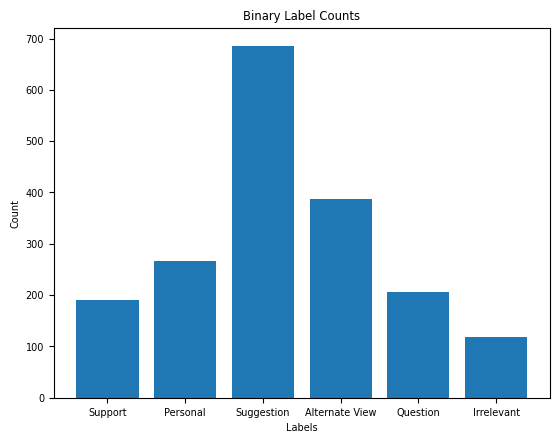

In [21]:
# Count the occurrences of each label
label_counts = df_filtered[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']].sum()
print(label_counts)

# Create a bar plot
plt.rcParams.update({'font.size': 7})
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Binary Label Counts')

# Display the plot
plt.show()

Support           0.153349
Personal          0.215496
Suggestion        0.553672
Alternate View    0.312349
Question          0.166263
Irrelevant        0.096045
dtype: float64


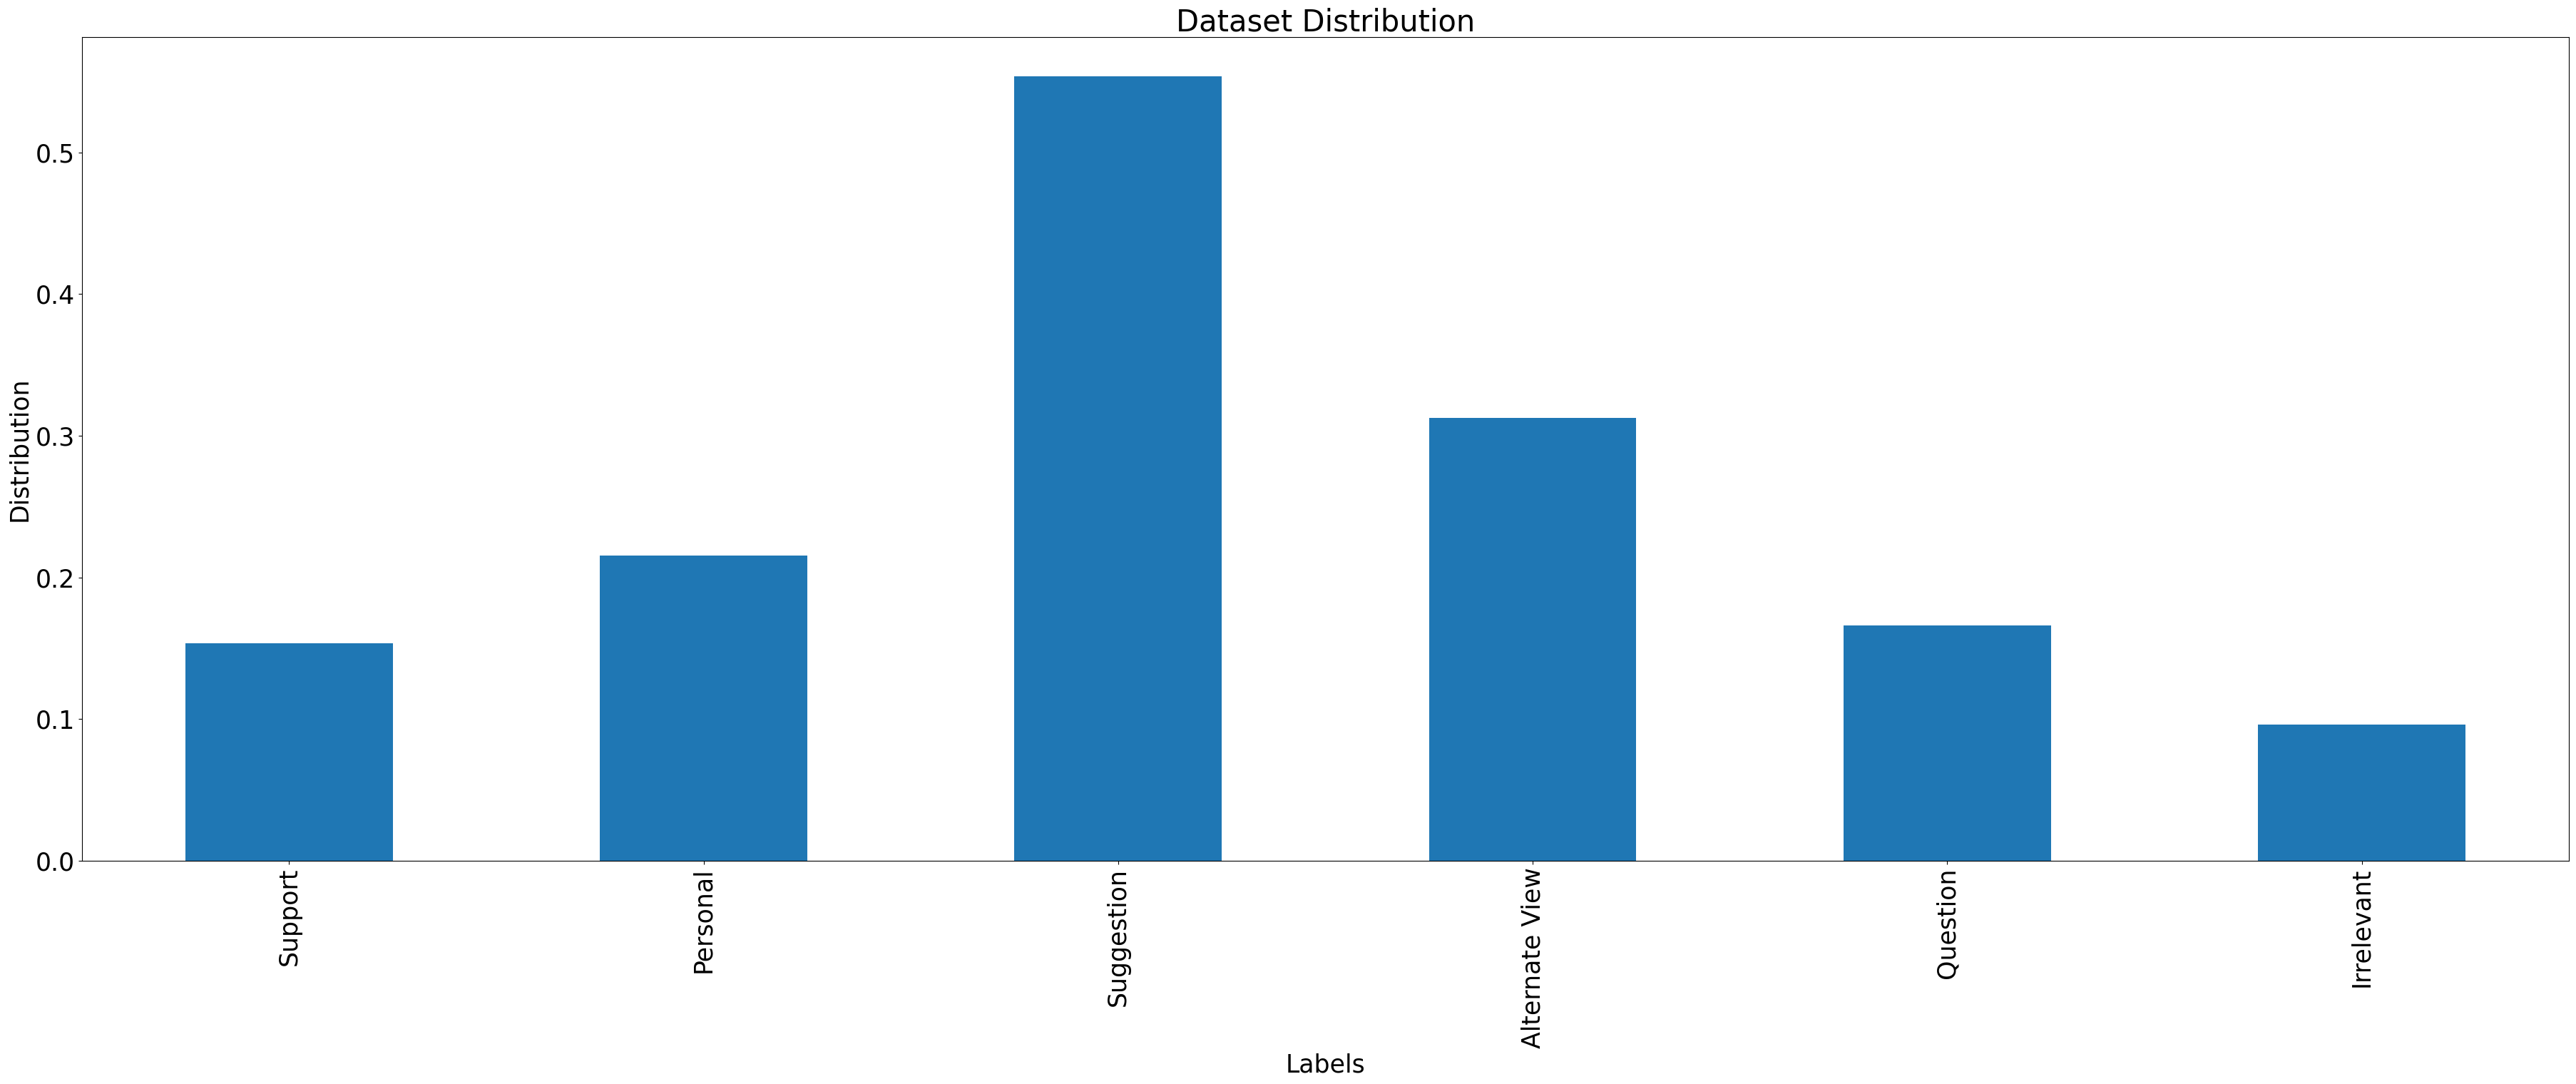

In [22]:
# Calculate the label distributions
label_distributions = df_filtered[['Support','Personal','Suggestion','Alternate View', 'Question','Irrelevant']].mean()
print(label_distributions)

# Display the plot
plt.rcParams.update({'font.size': 25})
plt.subplots(figsize=(45,15))
label_distributions.plot.bar(title="Dataset Distribution",xlabel="Labels", ylabel="Distribution");

# Transformers solo BERT


##Import relevant tools

In [23]:
import os

In [24]:
!pip install --upgrade simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 21.9 MB/s eta 0:00:00


In [25]:
from simpletransformers.classification import (
   MultiLabelClassificationModel, ClassificationModel, ClassificationArgs
)
import pandas as pd
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

## Keep only the content body and terms label, reorder them, and rename them.

In [26]:
sentpair = df_filtered.drop(columns=['news', 'Support', 'Personal', 'Suggestion', 'Alternate View', 'Question', 'Irrelevant', 'terms'])
sentpair = sentpair[['content', 'body', 'binary_terms']]
sentpair.columns = ["text_a", "text_b", "labels"]
sent = sentpair[["text_b", "labels"]]

In [27]:
sent

,text_b,labels
0,Staying Power- Peter Fryer,"[0, 0, 1, 0, 0, 0]"
1,No Strong Female Lead by Arwa Mahdawi? Very ea...,"[0, 0, 1, 0, 1, 0]"
2,Nice selection. Stuff about Africa and Nigeria...,"[1, 1, 0, 0, 1, 0]"
3,"An interesting collection, but seemingly mostl...","[0, 0, 1, 1, 0, 0]"
4,"If we want to explain the world, we should als...","[0, 0, 1, 0, 0, 0]"
...,...,...
1236,The player’s action was outrageous and dangero...,"[1, 0, 1, 1, 0, 0]"
1237,He lost his cool! He was frustrated! All BS! T...,"[0, 0, 0, 1, 0, 0]"
1238,"I played basketball for nearly thirty years, u...","[0, 1, 0, 0, 0, 0]"
1239,Too many below consider this a hate crime. I d...,"[0, 0, 1, 0, 0, 0]"


In [28]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(
    sent,
    test_size = test_split,
    stratify = df_filtered["terms"].values,
)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 991
Number of rows in test set: 248


In [29]:
train_df

,text_b,labels
324,"I've said this before as sharp edged quip: ""I ...","[0, 1, 1, 1, 0, 0]"
831,Call it what it is. Voter suppression. Glad it...,"[1, 1, 0, 0, 0, 0]"
317,The second tends to think that letting a bil...,"[0, 0, 1, 0, 0, 0]"
667,“Facebook’s machine learning tools predict you...,"[0, 0, 0, 1, 1, 0]"
418,It's interesting to read the number of people ...,"[1, 0, 1, 0, 0, 0]"
...,...,...
1037,972. Posted by Barley on Just now\n\nRemoaners...,"[0, 0, 1, 0, 0, 0]"
1223,POS\nHe showed who/what he is.\nDidn't get awa...,"[0, 0, 1, 0, 0, 0]"
508,"Newton and Zuckerberg in the same sentence, wh...","[0, 0, 0, 1, 0, 0]"
458,No,"[0, 0, 0, 1, 0, 0]"


## Run the model

In [30]:
import torch

cuda_available = torch.cuda.is_available()

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import random

In [32]:
seed = 1337

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [33]:
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
import numpy as np
from simpletransformers.classification import MultiLabelClassificationModel
from sklearn.model_selection import KFold

num_classes = 6
n = 5
kf = KFold(n_splits=n, random_state=seed, shuffle=True)
results = []

for train_index, val_index in kf.split(sent):
    train_df = sent.iloc[train_index]
    val_df = sent.iloc[val_index]

    model = MultiLabelClassificationModel('bert', 'bert-base-cased', use_cuda=cuda_available, num_labels=6,
                                         args={'num_train_epochs': 2, 'max_seq_length': 512, 'overwrite_output_dir': True,
                                               'use_early_stopping': True, 'early_stopping_delta': 0.01,
                                               'early_stopping_metric': 'eval_loss', 'early_stopping_metric_minimize': True,
                                               'early_stopping_patience': 3, 'evaluate_during_training_steps': 34})
    model.train_model(train_df)

    # Evaluate on validation set
    result, model_outputs, wrong_predictions = model.eval_model(val_df)

    # Convert probabilities to binary labels using a threshold
    y_pred = (model_outputs > 0.5).astype(int)

    # Convert y_true to a NumPy array of the same shape as y_pred
    y_true = np.array([np.array(label) for label in val_df['labels']])
    y_true = np.vstack(y_true)
    y_true = [list(labels) for labels in y_true]
    y_true = np.array(y_true)
    y_true

    accuracy = accuracy_score(y_true.reshape(-1, num_classes), y_pred.reshape(-1, num_classes))
    hamming_loss_value = hamming_loss(y_true.reshape(-1, num_classes), y_pred.reshape(-1, num_classes))
    f1_micro = f1_score(y_true.reshape(-1, num_classes), y_pred.reshape(-1, num_classes), average='micro')
    f1_macro = f1_score(y_true.reshape(-1, num_classes), y_pred.reshape(-1, num_classes), average='macro')
    micro_precision = precision_score(y_true.reshape(-1, num_classes), y_pred.reshape(-1, num_classes), average='micro')
    micro_recall = recall_score(y_true.reshape(-1, num_classes), y_pred.reshape(-1, num_classes), average='micro')

    result['accuracy'] = accuracy
    result['hamming_loss'] = hamming_loss_value
    result['f1_micro'] = f1_micro
    result['f1_macro'] = f1_macro
    result['micro_precision'] = micro_precision
    result['micro_recall'] = micro_recall

    results.append(result)

Some weights of BertForMultiLabelSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/991 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_utils.py:267: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  labels = torch.tensor(labels, dtype=torch.long)


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/248 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

Some weights of BertForMultiLabelSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/991 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/248 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

Some weights of BertForMultiLabelSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/991 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/248 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

Some weights of BertForMultiLabelSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/991 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/248 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

Some weights of BertForMultiLabelSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/992 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/124 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/247 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

In [34]:
results

[{'LRAP': 0.7734711021505377,
  'eval_loss': 0.3916732236262291,
  'accuracy': 0.2903225806451613,
  'hamming_loss': 0.1827956989247312,
  'f1_micro': 0.5928143712574849,
  'f1_macro': 0.42025653895849047,
  'micro_precision': 0.6898954703832753,
  'micro_recall': 0.5196850393700787},
 {'LRAP': 0.7765008960573472,
  'eval_loss': 0.369066808012224,
  'accuracy': 0.33064516129032256,
  'hamming_loss': 0.16061827956989247,
  'f1_micro': 0.6339969372128637,
  'f1_macro': 0.536915955200941,
  'micro_precision': 0.7064846416382252,
  'micro_recall': 0.575},
 {'LRAP': 0.7340445788530464,
  'eval_loss': 0.436186138660677,
  'accuracy': 0.23387096774193547,
  'hamming_loss': 0.20698924731182797,
  'f1_micro': 0.5232198142414861,
  'f1_macro': 0.25546028955542643,
  'micro_precision': 0.6475095785440613,
  'micro_recall': 0.43896103896103894},
 {'LRAP': 0.8168010752688171,
  'eval_loss': 0.3635619080835773,
  'accuracy': 0.33064516129032256,
  'hamming_loss': 0.16129032258064516,
  'f1_micro': 0

In [35]:
# List of metric names
metric_names = ['accuracy', 'hamming_loss', 'f1_macro', 'micro_precision', 'micro_recall', 'LRAP']

# Initialize a dictionary to store aggregated results
aggregated_results = {metric: [] for metric in metric_names}

# Loop through the results of each fold
for result in results:
    for metric in metric_names:
        aggregated_results[metric].append(result[metric])

# Calculate mean and standard deviation for each metric
mean_results = {metric: round(np.mean(values), 4) for metric, values in aggregated_results.items()}
std_results = {metric: round(np.std(values), 4) for metric, values in aggregated_results.items()}

# Print aggregated results
print("Aggregated Results:")
for metric in metric_names:
    print(f"Mean {metric.capitalize()}: {mean_results[metric]} ± {std_results[metric]}")

Aggregated Results:
Mean Accuracy: 0.2833 ± 0.0441
Mean Hamming_loss: 0.1781 ± 0.017
Mean F1_macro: 0.442 ± 0.1026
Mean Micro_precision: 0.683 ± 0.0195
Mean Micro_recall: 0.5332 ± 0.0648
Mean Lrap: 0.7726 ± 0.0267


In [36]:
# Record end time
start_time = time.time()
# Evaluate on the test set
test_result, test_model_outputs, _ = model.eval_model(test_df)
end_time = time.time()

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/248 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

In [37]:
# Compute additional evaluation metrics for the test set
y_test_true = np.array([np.array(label) for label in test_df['labels']])
y_test_true = np.vstack(y_test_true)
y_test_true = [list(labels) for labels in y_test_true]
y_test_true = np.array(y_test_true)
y_test_true

y_test_pred = test_model_outputs > 0.5  # Assuming threshold for classification is 0.5

test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_hamming_loss = hamming_loss(y_test_true, y_test_pred)
test_f1_macro = f1_score(y_test_true, y_test_pred, average='macro')
test_f1_micro = f1_score(y_test_true, y_test_pred, average='micro')
micro_precision = precision_score(y_test_true, y_test_pred, average='micro')
macro_precision = precision_score(y_test_true, y_test_pred, average='macro')
micro_recall = recall_score(y_test_true, y_test_pred, average='micro')
macro_recall = recall_score(y_test_true, y_test_pred, average='macro')
runtime_seconds = end_time - start_time

print("Test Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Hamming Loss: {test_hamming_loss}")
print(f"F1 Micro: {test_f1_micro}")
print(f"F1 Macro: {test_f1_macro}")
print(f"Micro Precision: {micro_precision}")
print(f"Macro Precision: {macro_precision}")
print(f"Micro Recall: {micro_recall}")
print(f"Micro Recall: {macro_recall}")
print(f"Runtime: {runtime_seconds:.2f} seconds")

Test Set Results:
Accuracy: 0.4475806451612903
Hamming Loss: 0.1196236559139785
F1 Micro: 0.7311178247734138
F1 Macro: 0.5876575418431136
Micro Precision: 0.825938566552901
Macro Precision: 0.872051849052235
Micro Recall: 0.6558265582655827
Micro Recall: 0.538294758652391
Runtime: 1.62 seconds


Error analysis next

In [1]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

# Create a MultiLabelBinarizer instance
mlb = MultiLabelBinarizer()

# Binarize the true and predicted labels
y_test_true_binarized = mlb.fit_transform(y_test_true)
y_test_pred_binarized = mlb.transform(y_test_pred)

# Calculate the multilabel confusion matrix
multilabel_cm = multilabel_confusion_matrix(y_test_true_binarized, y_test_pred_binarized)

# Print the confusion matrix for each label
for i, cm in enumerate(multilabel_cm):
    label_name = f"Label {i}"
    print(f"Confusion Matrix for {label_name}:\n{cm}\n")

# Visualize the multilabel confusion matrix with numbers
num_labels = len(multilabel_cm)
fig, axes = plt.subplots(num_labels, 1, figsize=(8, 8*num_labels))
for i, (cm, ax) in enumerate(zip(multilabel_cm, axes)):
    label_name = f"Label {i}"
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'Confusion Matrix for {label_name}')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted Negative', 'Predicted Positive'], fontsize=10)
    ax.set_yticklabels(['True Negative', 'True Positive'], fontsize=10)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('True', fontsize=12)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

NameError: ignored

In [39]:
texts = test_df['text_b']
texts

411          Banks are waaaaay behind the curve on this.
1      No Strong Female Lead by Arwa Mahdawi? Very ea...
221    She was quite good in What Happened to Monday....
619    One thing I will hazard a guess at is that if ...
899    The only election fraud is De-Pfeebel Johnson ...
                             ...                        
846    In all the years I worked on elections as a cl...
834    Trying to solve a non existent problem to cove...
700    Young people don’t want to understand anything...
542    If machine learning is applied to astrology wo...
546    Most so called 'AI' is the kind of algorithms ...
Name: text_b, Length: 248, dtype: object

In [40]:
# Compare predictions with ground truth
for i, (pred, true) in enumerate(zip(y_test_pred, y_test_true)):
    if not np.array_equal(pred, true):  # Check if the arrays are not equal
        print(f"Mismatch in example {i + 1}:")
        print("Predicted:", pred)
        print("Ground Truth:", true)
        print("Text:", texts.iloc[i])
        print()

Mismatch in example 1:
Predicted: [False False False False False False]
Ground Truth: [1 0 0 0 0 0]
Text: Banks are waaaaay behind the curve on this.

Mismatch in example 2:
Predicted: [False False  True False False False]
Ground Truth: [0 0 1 0 1 0]
Text: No Strong Female Lead by Arwa Mahdawi? Very easy to read. one of my girls already finished it in three days. Not only it was nice seeing her not on her mobile, but she really enjoyed the style and the way Arwa argued her points. https://linktr.ee/ARWAMAHDAWI https://www.hachette.co.uk/titles/arwa-mahdawi/strong-female-lead/9781529360653/

Mismatch in example 4:
Predicted: [False False False False False False]
Ground Truth: [0 0 1 0 0 0]
Text: One thing I will hazard a guess at is that if AI didn't make money for humans it wouldn't be nearly as popular.

Mismatch in example 7:
Predicted: [False False  True  True  True False]
Ground Truth: [0 0 0 1 1 0]
Text: I'd like to know how you can use ML to predict protein shapes without any the

# Play with the model

In [41]:
predictions, raw_outputs = model.predict(["Wonderful article. I've been reviled for saying devotion to your child isn't exactly 'Love' but more innate deeply caring natural response. But the Greeks are right on the many kinds of Love. I've always been fortunate with cats as they acted as my protectors, were friendly and affectionate, and recognised when I was in an emotional crisis [which my human pals never noticed] and jumped on my lap, unbidden, and stared deeply into my face and Willed me to feel comforted. Dogs are lovely, too, but need you as Alpha of their pack, so they can be told what to do--not exactly Love, more respectful devotion. But Love covers many forms."])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
predictions

[[0, 1, 1, 0, 0, 0]]

In [43]:
raw_outputs

array([[0.44311523, 0.73144531, 0.60253906, 0.1973877 , 0.03927612,
        0.06561279]])

In [44]:
predictions, raw_outputs = model.predict(["Thank you for making this news."])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
predictions

[[1, 0, 0, 0, 0, 0]]

In [46]:
predictions, raw_outputs = model.predict(["Wonderful article. The only 'person' that has ever truly loved me (apart from parents) was my dog. The loss was so great for me when he died that I have been unable to get another dog. This is over 10 years ago now. I still dream about him. Have you experienced anything similar?"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[[0, 0, 1, 0, 1, 0]]

In [47]:
predictions, raw_outputs = model.predict(["wow a lot of comments in code. as a basketball player i don't get it. that game must have been out of control or something. if that was the only cheap shot, that was one hell of a 1st blow."])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[[0, 0, 1, 0, 0, 0]]